# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing nltk libraries
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

In [2]:
df = pd.read_csv(r"C:\python\Ratings_reviews.csv")
df

,Unnamed: 0,Title,Review_text,Ratings
0,0,Open box product delivered,Product seal was open / broken and original ad...,3
1,1,"Awesome features and it's ""made in India"" budg...","It's a ""made in India"" laptop with great featu...",5
2,2,Open box product delivered,Product seal was open / broken and original ad...,3
3,3,"Awesome features and it's ""made in India"" budg...","It's a ""made in India"" laptop with great featu...",5
4,4,Open box product delivered,Product seal was open / broken and original ad...,3
...,...,...,...,...
24655,24655,Nice product,"Good product,, picture quality is nice",4
24656,24656,Nice,It's Very good deektop,3
24657,24657,Perfect product!,So nice product.,5
24658,24658,Super!,A mondol have a so nice and so also sumthnice ...,5


First we will drop the unwanted column "Unnamed: 0" from our dataset as it has no values.

# EDA

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))


We have 24660 Rows and 3 Columns in our dataframe


In [4]:
df.tail(30)

,Title,Review_text,Ratings
24630,Worth the money,Good product but the vga cable doesn’t fit pro...,4
24631,Worth every penny,super hit monitor\nvery powarfull Dell monitor,5
24632,Fabulous!,Nice,5
24633,Wonderful,Very well monitor\n& very well Services,5
24634,Perfect product!,Nice 🙂,5
24635,Terrific,Super,5
24636,Good choice,Nice,4
24637,Very poor,got defected product,1
24638,Good choice,Absolutely value for money. Dell stand for it'...,4
24639,Classy product,Value product,5


# check for missing values

In [5]:
df.isna().sum()

Title            0
Review_text    184
Ratings          0
dtype: int64

Using the isna() and sum() options together we can confirm that there some missing values in Review_text column that needs to be treated.

In [6]:
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 24476 Rows and 3 Columns in our dataframe after removing NaN


In [7]:
#Check for null values
df.isnull().sum()

Title          0
Review_text    0
Ratings        0
dtype: int64

There are no missing values in our dataset, so we shall proceed with further processing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24476 entries, 0 to 24659
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        24476 non-null  object
 1   Review_text  24476 non-null  object
 2   Ratings      24476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 764.9+ KB


In [9]:
df['Ratings'].unique()

array([3, 5, 1, 4, 2], dtype=int64)

In [10]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Title'].map(str)+' '+df['Review_text']
df

,Title,Review_text,Ratings,Review
0,Open box product delivered,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
1,"Awesome features and it's ""made in India"" budg...","It's a ""made in India"" laptop with great featu...",5,"Awesome features and it's ""made in India"" budg..."
2,Open box product delivered,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
3,"Awesome features and it's ""made in India"" budg...","It's a ""made in India"" laptop with great featu...",5,"Awesome features and it's ""made in India"" budg..."
4,Open box product delivered,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
...,...,...,...,...
24655,Nice product,"Good product,, picture quality is nice",4,"Nice product Good product,, picture quality is..."
24656,Nice,It's Very good deektop,3,Nice It's Very good deektop
24657,Perfect product!,So nice product.,5,Perfect product! So nice product.
24658,Super!,A mondol have a so nice and so also sumthnice ...,5,Super! A mondol have a so nice and so also sum...


In [11]:
df.drop(columns = 'Title',inplace = True)
df

,Review_text,Ratings,Review
0,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
1,"It's a ""made in India"" laptop with great featu...",5,"Awesome features and it's ""made in India"" budg..."
2,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
3,"It's a ""made in India"" laptop with great featu...",5,"Awesome features and it's ""made in India"" budg..."
4,Product seal was open / broken and original ad...,3,Open box product delivered Product seal was op...
...,...,...,...
24655,"Good product,, picture quality is nice",4,"Nice product Good product,, picture quality is..."
24656,It's Very good deektop,3,Nice It's Very good deektop
24657,So nice product.,5,Perfect product! So nice product.
24658,A mondol have a so nice and so also sumthnice ...,5,Super! A mondol have a so nice and so also sum...


In [12]:
df.drop(columns = 'Review_text',inplace = True)
df

,Ratings,Review
0,3,Open box product delivered Product seal was op...
1,5,"Awesome features and it's ""made in India"" budg..."
2,3,Open box product delivered Product seal was op...
3,5,"Awesome features and it's ""made in India"" budg..."
4,3,Open box product delivered Product seal was op...
...,...,...
24655,4,"Nice product Good product,, picture quality is..."
24656,3,Nice It's Very good deektop
24657,5,Perfect product! So nice product.
24658,5,Super! A mondol have a so nice and so also sum...


In [13]:
#Checking the average rating  by the users

avg = df['Ratings'].mean()
Avg = round(avg,1)
print("Average rating given by users is " + str(Avg))

Average rating given by users is 3.6


In [14]:
df['Ratings'].value_counts()

5    11379
1     5762
4     4186
3     1953
2     1196
Name: Ratings, dtype: int64

# Data Visualization

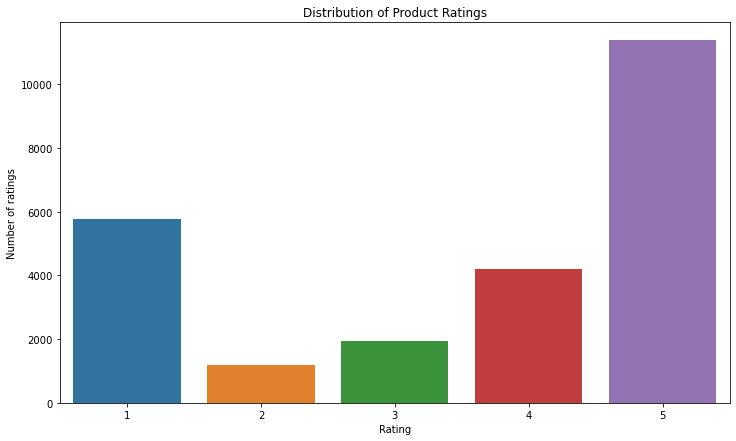

In [15]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Ratings'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

5 has been the maximum ratings by the users, followed by 1, 4, 3 and 2

Preprocessing using NLP

The steps involved are:

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

Splitting dataset into Training and Testing

In [16]:
!pip install Wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import re # for regex
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [17]:
def cleaning(df, df_column_name):
    
    #Converting  messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ ---> ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [18]:
cleaning(df, 'Review')
df['Review'].tail(3)

24657                         perfect product nice product
24658     super mondol nice also sumthnice like hd monitor
24659    brilliant perfect picture quality well working...
Name: Review, dtype: object

In [19]:
df['Review'].head(3)

0    open box product delivered product seal open b...
1    awesome features made india budget laptop made...
2    open box product delivered product seal open b...
Name: Review, dtype: object

# Tokenizing the data using RegexpTokenizer

In [20]:
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')
df['Review'] = df['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Ratings,Review
0,3,"[open, box, product, delivered, product, seal,..."
1,5,"[awesome, features, made, india, budget, lapto..."
2,3,"[open, box, product, delivered, product, seal,..."
3,5,"[awesome, features, made, india, budget, lapto..."
4,3,"[open, box, product, delivered, product, seal,..."


In [22]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


# Lemmatization and Stemming

In [21]:
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for i in text:
        if len(i)>=3:
            result.append(lemmatize_stemming(i))
            
    return result

In [22]:
#Processing review with above Function
processed_review = []

for i in df.Review:
    processed_review.append(preprocess(i))
    
print(len(processed_review))
processed_review[:5]

24476


[['open',
  'box',
  'product',
  'deliv',
  'product',
  'seal',
  'open',
  'break',
  'origin',
  'adaptor',
  'power',
  'cord',
  'replac',
  'box',
  'strain',
  'mark',
  'visibl',
  'product',
  'deliv'],
 ['awesom',
  'featur',
  'make',
  'india',
  'budget',
  'laptop',
  'make',
  'india',
  'laptop',
  'great',
  'featur',
  'budget',
  'friend',
  'ofcours',
  'reput',
  'taiwanes',
  'brand',
  'good',
  'start',
  'atmanirbhar',
  'bharat',
  'laptop',
  'love'],
 ['open',
  'box',
  'product',
  'deliv',
  'product',
  'seal',
  'open',
  'break',
  'origin',
  'adaptor',
  'power',
  'cord',
  'replac',
  'box',
  'strain',
  'mark',
  'visibl',
  'product',
  'deliv'],
 ['awesom',
  'featur',
  'make',
  'india',
  'budget',
  'laptop',
  'make',
  'india',
  'laptop',
  'great',
  'featur',
  'budget',
  'friend',
  'ofcours',
  'reput',
  'taiwanes',
  'brand',
  'good',
  'start',
  'atmanirbhar',
  'bharat',
  'laptop',
  'love'],
 ['open',
  'box',
  'product',


In [23]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Ratings,Review,clean_review
0,3,"[open, box, product, delivered, product, seal,...","[open, box, product, deliv, product, seal, ope..."
1,5,"[awesome, features, made, india, budget, lapto...","[awesom, featur, make, india, budget, laptop, ..."
2,3,"[open, box, product, delivered, product, seal,...","[open, box, product, deliv, product, seal, ope..."
3,5,"[awesome, features, made, india, budget, lapto...","[awesom, featur, make, india, budget, laptop, ..."
4,3,"[open, box, product, delivered, product, seal,...","[open, box, product, deliv, product, seal, ope..."


In [24]:
df['Review'] = df['clean_review'].apply(lambda x:' '.join(i for i in x))
df.head()

,Ratings,Review,clean_review
0,3,open box product deliv product seal open break...,"[open, box, product, deliv, product, seal, ope..."
1,5,awesom featur make india budget laptop make in...,"[awesom, featur, make, india, budget, laptop, ..."
2,3,open box product deliv product seal open break...,"[open, box, product, deliv, product, seal, ope..."
3,5,awesom featur make india budget laptop make in...,"[awesom, featur, make, india, budget, laptop, ..."
4,3,open box product deliv product seal open break...,"[open, box, product, deliv, product, seal, ope..."


# Rating 1 words

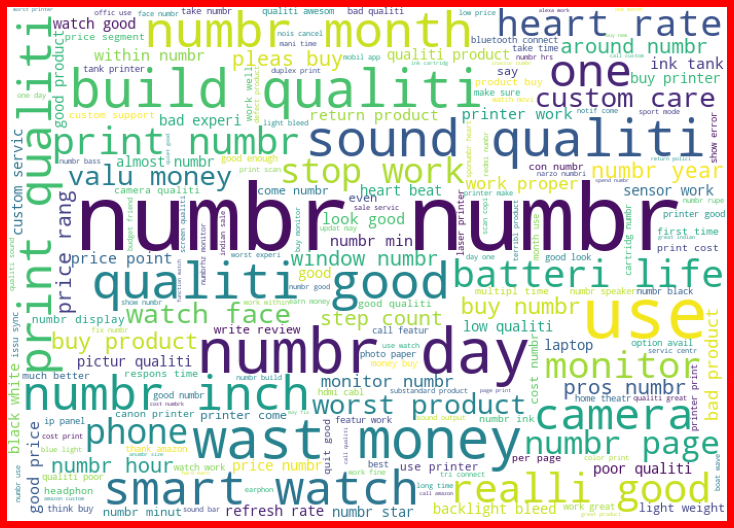

In [25]:
one = df['Review'][df['Ratings']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

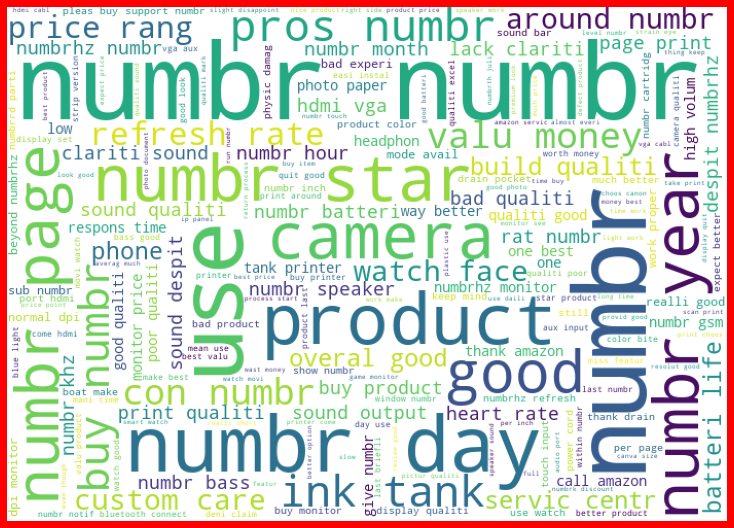

In [27]:
Two = df['Review'][df['Ratings']==2]

Two_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(Two))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Two_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

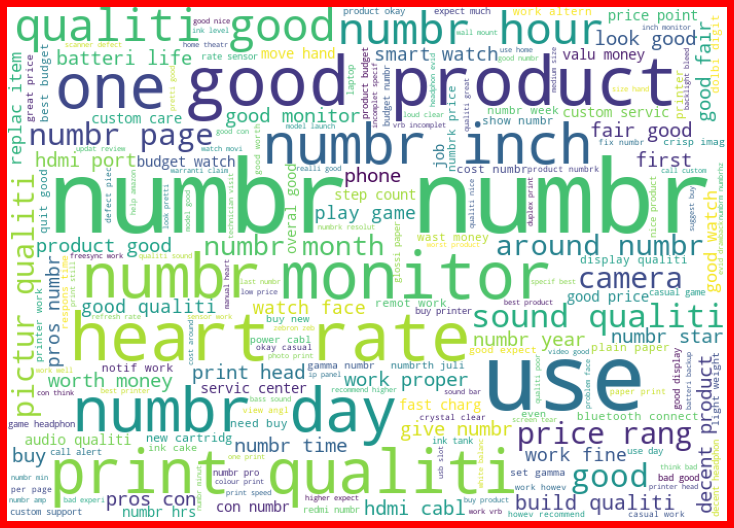

In [28]:
Three = df['Review'][df['Ratings']==3]

Three_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(Three))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Three_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

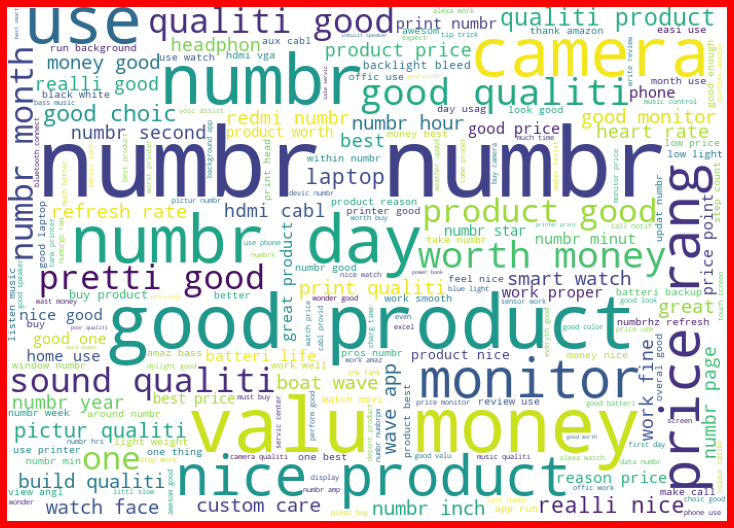

In [29]:
Four = df['Review'][df['Ratings']==4]

Four_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(Four))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Four_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

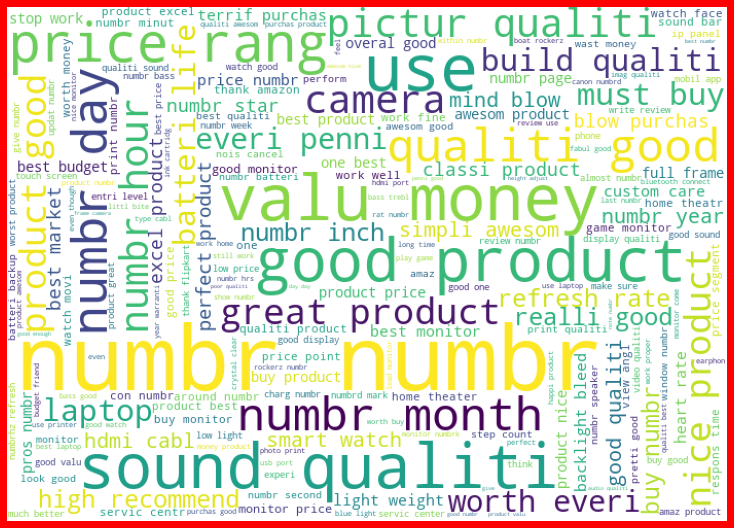

In [30]:
Five = df['Review'][df['Ratings']==5]

Five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(Five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

* The larger fonts indicates that the words are present in high frequency.

* Smaller fonts indicates less frequency of occurance

# Converting text into numeric using TfidfVectorizer

In [32]:
tf = TfidfVectorizer()

In [33]:
features = tf.fit_transform(df['Review'])
x=features


In [34]:
y=df['Ratings']

In [35]:
x.shape

(24476, 6891)

In [36]:
y.shape

(24476,)

# Model building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# TO Find Best Random State

MultinomialNB

In [38]:
maxAcc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(xtrain,ytrain)
    predmnb= mnb.predict(xtest)
    acc= accuracy_score(ytest,predmnb)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy_score is", maxAcc, 'on Random_state',maxRS)

Best Accuracy_score is 0.9 on Random_state 29


# To Find the Best Cross Validation Score

In [57]:
pred_tr= mnb.predict(xtrain)
pred_ts= mnb.predict(xtest)

In [58]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [59]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.41085144631475734 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 3 the cv score is 0.42642456257473144 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 4 the cv score is 0.4147327994770387 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 5 the cv score is 0.4270739783826366 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 6 the cv score is 0.43283988250035654 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 7 the cv score is 0.4468691138895217 and accuracy score for training is 0.6593065096499836 and the accuracy for testing is 0.75


At cross fold 8 the cv score is 0.4346541305309309 and accuracy score for training is 0.6593065096499836 and the accuracy for testing

Random_state= 29, CV score is best with cv=9. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=29)

In [40]:
#MultinomialNB
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
predmnb= mnb.predict(xtest)
print('acc=', accuracy_score(ytest,predmnb))
print(confusion_matrix(ytest,predmnb))
print(classification_report(ytest,predmnb))

acc= 0.9
[[9 0 0 0]
 [1 0 0 0]
 [0 0 1 1]
 [0 0 0 8]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           5       0.89      1.00      0.94         8

    accuracy                           0.90        20
   macro avg       0.70      0.62      0.64        20
weighted avg       0.86      0.90      0.87        20



In [84]:
scr1=cross_val_score(mnb, x,y, cv=9)
print('Cross Validation Score of MultinomialNB is:', scr1.mean())

Cross Validation Score of MultinomialNB is: 0.3971513249777047


In [42]:
diff= 0.9- 0.422
diff

0.47800000000000004

In [64]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 0.95
[[9 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 1 7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.95        20



In [65]:
scr3=cross_val_score(dtc, x,y, cv=9)
print('Cross Validation Score of DecisionTreeClassifier is:', scr3.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.464156687868233


In [66]:
diff=0.95-0.4614
diff

0.4886

In [67]:
#RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('acc=', accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

acc= 1.0
[[9 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [68]:
scr=cross_val_score(rf, x,y, cv=9)
print('Cross Validation Score of RandomForestClassifier is:', scr.mean())

Cross Validation Score of RandomForestClassifier is: 0.48311376070594964


In [69]:
diff= 1.0-0.4831
diff

0.5169

In [70]:
#KNN
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('acc=', accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

acc= 0.95
[[9 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 1 7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.95        20



In [71]:
scr2=cross_val_score(knn, x,y, cv=9)
print('Cross Validation Score of KNeighborsClassifier is:', scr2.mean())

Cross Validation Score of KNeighborsClassifier is: 0.3215309027251945


In [72]:
difff=0.95-0.321
diff

0.5169

In [73]:
#SVC
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('acc=', accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

acc= 1.0
[[9 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [74]:
scr5=cross_val_score(svc, x,y, cv=9)
print('Cross Validation Score of KNeighborsClassifier is:', scr5.mean())

Cross Validation Score of KNeighborsClassifier is: 0.4570515640361821


In [75]:
diff=1.0-0.457
diff

0.5429999999999999

With MultinomialNB Cv score and accuracy score difference is less compared to the other models

# GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV

In [50]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [51]:
parameters={'criterion': ["gini", "entropy"],
            'splitter': ["best", "random"],
            'max_depth':[1,2,3],
            'min_samples_split': [2,3,4,5],
            'max_features':["auto", "sqrt", "log2"]}

In [53]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameters, cv=9, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'best'}

In [54]:
GCV.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=4)

In [55]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.35

In [89]:
dtc=DecisionTreeClassifier(criterion= 'entropy',
                           max_features= 'sqrt',
                           splitter= 'best')
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('acc=', accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

acc= 0.95
[[9 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 1 7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.95        20



Apart from best parameters there are other parameters which may give better results.

# Save The Model

In [90]:
import pickle
filename= 'Ratings_Review.pkl'
pickle.dump(dtc,open(filename, 'wb'))

In [91]:
x=np.array(ytest)
predicted= np.array(dtc.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1,1
1,5,5
2,1,1
3,3,3
4,5,5
5,1,1
6,1,1
7,1,1
8,5,4
9,1,1


The predicted results are mostly equal to the original results. The model gave 95% accuracy without overfitting

In [93]:
df_con.to_csv('Ratings_Results.csv', index=False)

 Inference

-> After the completion of this project, we got an insight of how to collect data, preprocessing the data, analyzing the data and building a model.

-> First, we collected the reviews and ratings data from different e-commerce websites like Amazon and Flipkart and it was done by using Webscraping. The framework used for webscraping was Selenium, which has an advantage of automating our process of collecting data.

-> We collected almost 24000 of data which contained the ratings from 1.0 to 5.0 and their reviews.

-> Then, the scrapped data was combined in a single dataframe and saved in a csv file so that we can open it and analyze the data.

-> We did the preprocessing using NLP and the steps are as follows:

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

Splitting dataset into Training and Testing

-> After separating our train and test data, we started running different machine learning classification algorithms to find out the best performing model.

-> We found that RandomForest and GradienBoosting Algorithms were performing well, according to their accuracy and cross val scores.

-> Then, we performed Hyperparameter Tuning techniques using GridSearchCV for getting the best parameters and improving the scores. In that, RandomForestClassifier performed well and we finalised that model.

-> We saved the model in pkl format and then saved the predicted values in a csv format.

-> The problems we faced during this project were:

More time consumption during hyperparameter tuning for both models, as the data was large.

Less number of parameters were used during tuning.

Scrapping of data from different websites were of different process and the length of data were differing in most cases.

Some of the reviews were bad and the text had more wrong information about the product.

WordCloud was not showing proper text which had more positive and negative weightage.

-> Areas of improvement:

Less time complexity

More computational power can be given

More accurate reviews can be given

Less errors can be avoided.